## This notebook involves preprocessing of the data, handling missing values and null values and feature engineering

In [1]:
import pandas as pd
df= pd.read_csv('../data/hydrodata_polgolla_unprocessed_2000-2025.csv')
df

,DATE,WATER_LEVEL(MSL),STORAGE (MCM),STORAGE _PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm)
0,1/1/2000,440.21,3.513,85.43,0.653,0,0.653,1.143,126,0
1,1/2/2000,440.51,3.851,93.65,0.647,0.035,0.682,0.847,113,0
2,1/3/2000,440.72,4.083,99.29,1.098,0,1.098,1.127,206,0
3,1/4/2000,440.74,4.112,100,2.299,0.551,2.85,3.228,448,2
4,1/5/2000,440.74,4.112,100,3.04,0.824,3.864,3.484,571,1
...,...,...,...,...,...,...,...,...,...,...
9186,2/24/2025,440.40,3.720,90.47,1.796,0.000,NaN,1.581,340,0.0
9187,2/25/2025,440.20,3.504,85.21,1.471,0.000,NaN,1.589,274,0.2
9188,2/26/2025,440.31,3.622,88.08,1.651,0.000,NaN,2.069,319,15.5
9189,2/27/2025,440.68,4.040,98.25,2.445,0.019,NaN,2.319,416,NaN


In [ ]:
df.describe()

,DATE,WATER_LEVEL(MSL),STORAGE (MCM),STORAGE _PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm)
count,9191,9183,9173,9155,9185,9188,8399,9178,9182,9040
unique,9160,176,293,354,3606,4482,5665,6142,911,587
top,8/5/2011,440.74,4.112,100,4.893,0,#VALUE!,0,0,0
freq,2,4016,4035,4009,670,2095,99,18,170,4855


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   DATE                             9191 non-null   object
 1   WATER_LEVEL(MSL)                 9183 non-null   object
 2   STORAGE (MCM)                    9173 non-null   object
 3   STORAGE _PERCENTAGE              9155 non-null   object
 4   RAJARATA_POWER_RELEASE(MCM)      9185 non-null   object
 5   VICTORIYA_SPILLWAY_RELEASE(MCM)  9188 non-null   object
 6   TOTAL_RELESE(MCM)                8399 non-null   object
 7   INFLOW(MCM)                      9178 non-null   object
 8   ENERGY(MWh)                      9182 non-null   object
 9   RAINFALL(mm)                     9040 non-null   object
dtypes: object(10)
memory usage: 718.2+ KB


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('*', '_')
df

,DATE,WATER_LEVEL(MSL),STORAGE_(MCM),STORAGE__PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm)
0,1/1/2000,440.21,3.513,85.43,0.653,0,0.653,1.143,126,0
1,1/2/2000,440.51,3.851,93.65,0.647,0.035,0.682,0.847,113,0
2,1/3/2000,440.72,4.083,99.29,1.098,0,1.098,1.127,206,0
3,1/4/2000,440.74,4.112,100,2.299,0.551,2.85,3.228,448,2
4,1/5/2000,440.74,4.112,100,3.04,0.824,3.864,3.484,571,1
...,...,...,...,...,...,...,...,...,...,...
9186,2/24/2025,440.40,3.720,90.47,1.796,0.000,NaN,1.581,340,0.0
9187,2/25/2025,440.20,3.504,85.21,1.471,0.000,NaN,1.589,274,0.2
9188,2/26/2025,440.31,3.622,88.08,1.651,0.000,NaN,2.069,319,15.5
9189,2/27/2025,440.68,4.040,98.25,2.445,0.019,NaN,2.319,416,NaN


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df

,DATE,WATER_LEVEL(MSL),STORAGE_(MCM),STORAGE__PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm)
0,2000-01-01,440.21,3.513,85.43,0.653,0,0.653,1.143,126,0
1,2000-01-02,440.51,3.851,93.65,0.647,0.035,0.682,0.847,113,0
2,2000-01-03,440.72,4.083,99.29,1.098,0,1.098,1.127,206,0
3,2000-01-04,440.74,4.112,100,2.299,0.551,2.85,3.228,448,2
4,2000-01-05,440.74,4.112,100,3.04,0.824,3.864,3.484,571,1
...,...,...,...,...,...,...,...,...,...,...
9186,2025-02-24,440.40,3.720,90.47,1.796,0.000,NaN,1.581,340,0.0
9187,2025-02-25,440.20,3.504,85.21,1.471,0.000,NaN,1.589,274,0.2
9188,2025-02-26,440.31,3.622,88.08,1.651,0.000,NaN,2.069,319,15.5
9189,2025-02-27,440.68,4.040,98.25,2.445,0.019,NaN,2.319,416,NaN


In [ ]:
def clean_numeric(x):
    if pd.isna(x):
        return np.nan
    if isinstance(x, str):
        x = x.strip()
        if x == '-' or x == '' or x.lower() == 'nan' or x.lower() == 'nill' or x.lower() == 'nil' or x == '#VALUE!':
            return np.nan

        if x.count('.') > 1:
            parts = x.split('.')
            x = parts[0] + '.' + ''.join(parts[1:])

        if x.endswith('+'):
            return float(x.rstrip('+'))
        try:
            return float(x)
        except ValueError:
            print(f"Could not convert value: '{x}' to float")
            return np.nan
    return x

# Apply cleaning to all numeric columns
numeric_columns = ['WATER_LEVEL(MSL)', 'STORAGE_(MCM)', 'STORAGE__PERCENTAGE',
                  'RAJARATA_POWER_RELEASE(MCM)', 'B/OUTLET_RELEASE(MCM)',
                  'VICTORIYA_SPILLWAY_RELEASE(MCM)', 'TOTAL_RELESE(MCM)',
                  'INFLOW(MCM)', 'ENERGY(MWh)', 'RAINFALL(mm)']

# It's safer to first apply the cleaning function, then check for any remaining non-numeric values
for col in numeric_columns:
    if col in df.columns:
        # Apply the cleaning function
        df[col] = df[col].apply(clean_numeric)

        # Check for any non-numeric values that might remain
        non_numeric = df[~pd.to_numeric(df[col], errors='coerce').notna() & df[col].notna()]
        if len(non_numeric) > 0:
            print(f"Column {col} still has {len(non_numeric)} non-numeric values:")
            print(non_numeric[col].unique())

        # Finally convert to float, coercing any remaining problems to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')
df

,DATE,WATER_LEVEL(MSL),STORAGE_(MCM),STORAGE__PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm)
0,2000-01-01,440.21,3.513,85.43,0.653,0.000,0.653,1.143,126.0,0.0
1,2000-01-02,440.51,3.851,93.65,0.647,0.035,0.682,0.847,113.0,0.0
2,2000-01-03,440.72,4.083,99.29,1.098,0.000,1.098,1.127,206.0,0.0
3,2000-01-04,440.74,4.112,100.00,2.299,0.551,2.850,3.228,448.0,2.0
4,2000-01-05,440.74,4.112,100.00,3.040,0.824,3.864,3.484,571.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9186,2025-02-24,440.40,3.720,90.47,1.796,0.000,NaN,1.581,340.0,0.0
9187,2025-02-25,440.20,3.504,85.21,1.471,0.000,NaN,1.589,274.0,0.2
9188,2025-02-26,440.31,3.622,88.08,1.651,0.000,NaN,2.069,319.0,15.5
9189,2025-02-27,440.68,4.040,98.25,2.445,0.019,NaN,2.319,416.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATE                             9191 non-null   datetime64[ns]
 1   WATER_LEVEL(MSL)                 9154 non-null   float64       
 2   STORAGE_(MCM)                    9143 non-null   float64       
 3   STORAGE__PERCENTAGE              9153 non-null   float64       
 4   RAJARATA_POWER_RELEASE(MCM)      9093 non-null   float64       
 5   VICTORIYA_SPILLWAY_RELEASE(MCM)  9170 non-null   float64       
 6   TOTAL_RELESE(MCM)                8300 non-null   float64       
 7   INFLOW(MCM)                      9166 non-null   float64       
 8   ENERGY(MWh)                      9025 non-null   float64       
 9   RAINFALL(mm)                     8820 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 718.2 KB


In [ ]:
print("\nMissing values count after initial cleaning:")
df.isna().sum()


Missing values count after initial cleaning:


,0
DATE,0
WATER_LEVEL(MSL),37
STORAGE_(MCM),48
STORAGE__PERCENTAGE,38
RAJARATA_POWER_RELEASE(MCM),98
VICTORIYA_SPILLWAY_RELEASE(MCM),21
TOTAL_RELESE(MCM),891
INFLOW(MCM),25
ENERGY(MWh),166
RAINFALL(mm),371


In [ ]:
# Setting 'DATE' as the index before interpolation
df = df.set_index('DATE')
for col in ['WATER_LEVEL(MSL)', 'STORAGE_(MCM)', 'STORAGE__PERCENTAGE']:
    if col in df.columns:

        df[col] = df[col].interpolate(method='time')
df = df.reset_index()
df

,DATE,WATER_LEVEL(MSL),STORAGE_(MCM),STORAGE__PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm)
0,2000-01-01,440.21,3.513,85.43,0.653,0.000,0.653,1.143,126.0,0.0
1,2000-01-02,440.51,3.851,93.65,0.647,0.035,0.682,0.847,113.0,0.0
2,2000-01-03,440.72,4.083,99.29,1.098,0.000,1.098,1.127,206.0,0.0
3,2000-01-04,440.74,4.112,100.00,2.299,0.551,2.850,3.228,448.0,2.0
4,2000-01-05,440.74,4.112,100.00,3.040,0.824,3.864,3.484,571.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9186,2025-02-24,440.40,3.720,90.47,1.796,0.000,NaN,1.581,340.0,0.0
9187,2025-02-25,440.20,3.504,85.21,1.471,0.000,NaN,1.589,274.0,0.2
9188,2025-02-26,440.31,3.622,88.08,1.651,0.000,NaN,2.069,319.0,15.5
9189,2025-02-27,440.68,4.040,98.25,2.445,0.019,NaN,2.319,416.0,NaN


In [ ]:
# For rainfall - replace with 0 (assuming missing rainfall means no rain)
if 'RAINFALL(mm)' in df.columns:
    df['RAINFALL(mm)'] = df['RAINFALL(mm)'].fillna(0)
df

,DATE,WATER_LEVEL(MSL),STORAGE_(MCM),STORAGE__PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm)
0,2000-01-01,440.21,3.513,85.43,0.653,0.000,0.653,1.143,126.0,0.0
1,2000-01-02,440.51,3.851,93.65,0.647,0.035,0.682,0.847,113.0,0.0
2,2000-01-03,440.72,4.083,99.29,1.098,0.000,1.098,1.127,206.0,0.0
3,2000-01-04,440.74,4.112,100.00,2.299,0.551,2.850,3.228,448.0,2.0
4,2000-01-05,440.74,4.112,100.00,3.040,0.824,3.864,3.484,571.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9186,2025-02-24,440.40,3.720,90.47,1.796,0.000,NaN,1.581,340.0,0.0
9187,2025-02-25,440.20,3.504,85.21,1.471,0.000,NaN,1.589,274.0,0.2
9188,2025-02-26,440.31,3.622,88.08,1.651,0.000,NaN,2.069,319.0,15.5
9189,2025-02-27,440.68,4.040,98.25,2.445,0.019,NaN,2.319,416.0,0.0


In [ ]:
# For inflow and release - combine approach: short gaps interpolated, longer gaps use seasonal patterns
for col in ['INFLOW(MCM)', 'TOTAL_RELESE(MCM)', 'RAJARATA_POWER_RELEASE(MCM)',
           'VICTORIYA_SPILLWAY_RELEASE(MCM)']:
    if col in df.columns:
        # Check if DATE column exists and is a datetime
        if 'DATE' in df.columns:
            # Ensure DATE is datetime type
            if not pd.api.types.is_datetime64_dtype(df['DATE']):
                df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

            # Temporarily set DATE as index for time-based interpolation
            temp_df = df.set_index('DATE')
            # First interpolate short gaps (up to 3 days)
            temp_df[col] = temp_df[col].interpolate(method='time', limit=3)
            # Get the processed column back
            df[col] = temp_df[col].reset_index(drop=True)

            # For remaining gaps, use seasonal approach
            # Add month column for seasonal patterns
            df['MONTH'] = df['DATE'].dt.month

            # Fill remaining NaNs with the mean for that month
            monthly_means = df.groupby('MONTH')[col].transform('mean')
            df[col] = df[col].fillna(monthly_means)
        else:
            # If no DATE column, use regular interpolation
            print(f"Warning: No DATE column found, using regular interpolation for {col}")
            df[col] = df[col].interpolate(limit=3)

        # If any NaNs still remain, use forward fill as last resort
        df[col] = df[col].fillna(method='ffill').fillna(method='bfill')
        df[col] = df[col].ffill().bfill()

# Clean up - remove MONTH column if it was added
if 'MONTH' in df.columns:
    df = df.drop('MONTH', axis=1)

df

<ipython-input-15-476b639141ee>:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill').fillna(method='bfill')
<ipython-input-15-476b639141ee>:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill').fillna(method='bfill')
<ipython-input-15-476b639141ee>:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill').fillna(method='bfill')
<ipython-input-15-476b639141ee>:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill').fillna(method='bfill')


,DATE,WATER_LEVEL(MSL),STORAGE_(MCM),STORAGE__PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm)
0,2000-01-01,440.21,3.513,85.43,0.653,0.000,0.653000,1.143,126.0,0.0
1,2000-01-02,440.51,3.851,93.65,0.647,0.035,0.682000,0.847,113.0,0.0
2,2000-01-03,440.72,4.083,99.29,1.098,0.000,1.098000,1.127,206.0,0.0
3,2000-01-04,440.74,4.112,100.00,2.299,0.551,2.850000,3.228,448.0,2.0
4,2000-01-05,440.74,4.112,100.00,3.040,0.824,3.864000,3.484,571.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9186,2025-02-24,440.40,3.720,90.47,1.796,0.000,2.916347,1.581,340.0,0.0
9187,2025-02-25,440.20,3.504,85.21,1.471,0.000,2.916347,1.589,274.0,0.2
9188,2025-02-26,440.31,3.622,88.08,1.651,0.000,2.916347,2.069,319.0,15.5
9189,2025-02-27,440.68,4.040,98.25,2.445,0.019,2.916347,2.319,416.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATE                             9191 non-null   datetime64[ns]
 1   WATER_LEVEL(MSL)                 9191 non-null   float64       
 2   STORAGE_(MCM)                    9191 non-null   float64       
 3   STORAGE__PERCENTAGE              9191 non-null   float64       
 4   RAJARATA_POWER_RELEASE(MCM)      9191 non-null   float64       
 5   VICTORIYA_SPILLWAY_RELEASE(MCM)  9191 non-null   float64       
 6   TOTAL_RELESE(MCM)                9191 non-null   float64       
 7   INFLOW(MCM)                      9191 non-null   float64       
 8   ENERGY(MWh)                      9025 non-null   float64       
 9   RAINFALL(mm)                     9191 non-null   float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 718.2 KB


In [ ]:
# 9. Check for any remaining missing values
print("\nRemaining missing values after processing:")
print(df.isna().sum())


Remaining missing values after processing:
DATE                                 0
WATER_LEVEL(MSL)                     0
STORAGE_(MCM)                        0
STORAGE__PERCENTAGE                  0
RAJARATA_POWER_RELEASE(MCM)          0
VICTORIYA_SPILLWAY_RELEASE(MCM)      0
TOTAL_RELESE(MCM)                    0
INFLOW(MCM)                          0
ENERGY(MWh)                        166
RAINFALL(mm)                         0
dtype: int64


In [ ]:
# Handle missing values in the ENERGY(MWh) column
if 'ENERGY(MWh)' in df.columns:
    print(f"Processing ENERGY(MWh) column - {df['ENERGY(MWh)'].isna().sum()} missing values")

    # First try to interpolate short gaps
    if 'DATE' in df.columns and pd.api.types.is_datetime64_dtype(df['DATE']):
        # Temporarily set DATE as index for time-based interpolation
        temp_df = df.set_index('DATE')
        temp_df['ENERGY(MWh)'] = temp_df['ENERGY(MWh)'].interpolate(method='time', limit=3)
        # Get the processed column back
        df['ENERGY(MWh)'] = temp_df['ENERGY(MWh)'].reset_index(drop=True)
    else:
        # Use regular interpolation
        df['ENERGY(MWh)'] = df['ENERGY(MWh)'].interpolate(limit=3)

    # For hydropower energy, water level and storage can be relevant
    # Try to find relationships with other variables if there are still missing values
    if df['ENERGY(MWh)'].isna().sum() > 0:
        potential_predictors = ['WATER_LEVEL(MSL)', 'STORAGE_(MCM)', 'TOTAL_RELESE(MCM)']
        best_predictor = None
        highest_corr = 0

        # Find the column with the highest correlation to energy
        for col in potential_predictors:
            if col in df.columns:
                # Calculate correlation with energy
                valid_data = df.dropna(subset=['ENERGY(MWh)', col])
                if len(valid_data) > 30:  # Enough data points
                    corr = abs(valid_data['ENERGY(MWh)'].corr(valid_data[col]))
                    if corr > highest_corr:
                        highest_corr = corr
                        best_predictor = col

        if best_predictor and highest_corr > 0.3:  # Only use if correlation is meaningful
            print(f"Using {best_predictor} (correlation: {highest_corr:.2f}) to estimate missing ENERGY values")

            from sklearn.linear_model import LinearRegression

            # Get indices where energy is missing but predictor is available
            missing_energy_idx = df['ENERGY(MWh)'].isna() & df[best_predictor].notna()

            if missing_energy_idx.sum() > 0:
                # Train a model on valid data
                valid_data = df.dropna(subset=['ENERGY(MWh)', best_predictor])
                X = valid_data[best_predictor].values.reshape(-1, 1)
                y = valid_data['ENERGY(MWh)'].values

                model = LinearRegression()
                model.fit(X, y)

                # Predict missing energy values
                X_missing = df.loc[missing_energy_idx, best_predictor].values.reshape(-1, 1)
                y_pred = model.predict(X_missing)

                # Fill in predictions
                df.loc[missing_energy_idx, 'ENERGY(MWh)'] = y_pred

    # Fill any remaining NaN values with seasonal patterns
    if df['ENERGY(MWh)'].isna().sum() > 0:
        # Use monthly averages if date is available
        if 'MONTH' not in df.columns and 'DATE' in df.columns:
            df['MONTH'] = df['DATE'].dt.month

        if 'MONTH' in df.columns:
            print("Using monthly patterns to fill remaining missing ENERGY values")
            monthly_means = df.groupby('MONTH')['ENERGY(MWh)'].transform('mean')
            df['ENERGY(MWh)'] = df['ENERGY(MWh)'].fillna(monthly_means)

    # As a last resort, use the overall mean and add small random variation
    if df['ENERGY(MWh)'].isna().sum() > 0:
        import numpy as np

        overall_mean = df['ENERGY(MWh)'].mean()
        overall_std = df['ENERGY(MWh)'].std() * 0.1  # Use 10% of std for variation

        # Get indices of remaining missing values
        still_missing_idx = df['ENERGY(MWh)'].isna()
        num_missing = still_missing_idx.sum()

        print(f"Filling {num_missing} remaining values with overall mean plus random variation")
        # Generate values using mean and small variation
        random_values = np.random.normal(overall_mean, overall_std, size=num_missing)

        # Fill in the generated values
        df.loc[still_missing_idx, 'ENERGY(MWh)'] = random_values

    # Check if there are still missing values
    missing_count = df['ENERGY(MWh)'].isna().sum()
    if missing_count > 0:
        print(f"Warning: {missing_count} missing values remain in ENERGY(MWh) column")
    else:
        print("All missing values in ENERGY(MWh) have been handled")

    # Clean up - remove MONTH column if it was added just for this
    if 'MONTH' in df.columns and 'MONTH' not in df.columns.tolist():
        df = df.drop('MONTH', axis=1)
df

Processing ENERGY(MWh) column - 166 missing values
Using monthly patterns to fill remaining missing ENERGY values
All missing values in ENERGY(MWh) have been handled


,DATE,WATER_LEVEL(MSL),STORAGE_(MCM),STORAGE__PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm),MONTH
0,2000-01-01,440.21,3.513,85.43,0.653,0.000,0.653000,1.143,126.0,0.0,1
1,2000-01-02,440.51,3.851,93.65,0.647,0.035,0.682000,0.847,113.0,0.0,1
2,2000-01-03,440.72,4.083,99.29,1.098,0.000,1.098000,1.127,206.0,0.0,1
3,2000-01-04,440.74,4.112,100.00,2.299,0.551,2.850000,3.228,448.0,2.0,1
4,2000-01-05,440.74,4.112,100.00,3.040,0.824,3.864000,3.484,571.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
9186,2025-02-24,440.40,3.720,90.47,1.796,0.000,2.916347,1.581,340.0,0.0,2
9187,2025-02-25,440.20,3.504,85.21,1.471,0.000,2.916347,1.589,274.0,0.2,2
9188,2025-02-26,440.31,3.622,88.08,1.651,0.000,2.916347,2.069,319.0,15.5,2
9189,2025-02-27,440.68,4.040,98.25,2.445,0.019,2.916347,2.319,416.0,0.0,2


In [ ]:
# 9. Check for any remaining missing values
print("\nRemaining missing values after processing:")
print(df.isna().sum())


Remaining missing values after processing:
DATE                               0
WATER_LEVEL(MSL)                   0
STORAGE_(MCM)                      0
STORAGE__PERCENTAGE                0
RAJARATA_POWER_RELEASE(MCM)        0
VICTORIYA_SPILLWAY_RELEASE(MCM)    0
TOTAL_RELESE(MCM)                  0
INFLOW(MCM)                        0
ENERGY(MWh)                        0
RAINFALL(mm)                       0
MONTH                              0
dtype: int64


In [ ]:
# Add year, month and day columns
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['DAY'] = df['DATE'].dt.day

In [ ]:
# Calculate net water balance (inflow - outflow)
if 'INFLOW(MCM)' in df.columns and 'TOTAL_RELESE(MCM)' in df.columns:
    df['WATER_BALANCE'] = df['INFLOW(MCM)'] - df['TOTAL_RELESE(MCM)']

In [ ]:


# # 13. Save the cleaned dataset
# df.to_csv('cleaned_reservoir_data.csv', index=False)
# print("\nCleaned data saved to 'cleaned_reservoir_data.csv'")

# 14. Generate basic statistics of the cleaned data
print("\nCleaned data statistics:")
print(df.describe())


Cleaned data statistics:
                                DATE  WATER_LEVEL(MSL)  STORAGE_(MCM)  \
count                           9191       9191.000000    9191.000000   
mean   2012-07-29 18:22:21.921444864        439.656504       3.931732   
min              2000-01-01 00:00:00          0.000000       0.000000   
25%              2006-04-16 12:00:00        440.490000       3.822000   
50%              2012-06-30 00:00:00        440.700000       4.054000   
75%              2018-11-14 12:00:00        440.740000       4.112000   
max              2025-02-28 00:00:00        441.030000       5.991000   
std                              NaN         19.930041       0.299484   

       STORAGE__PERCENTAGE  RAJARATA_POWER_RELEASE(MCM)  \
count          9191.000000                  9191.000000   
mean             96.395512                     2.424417   
min               0.000000                     0.000000   
25%              92.950000                     1.060000   
50%              98.5

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

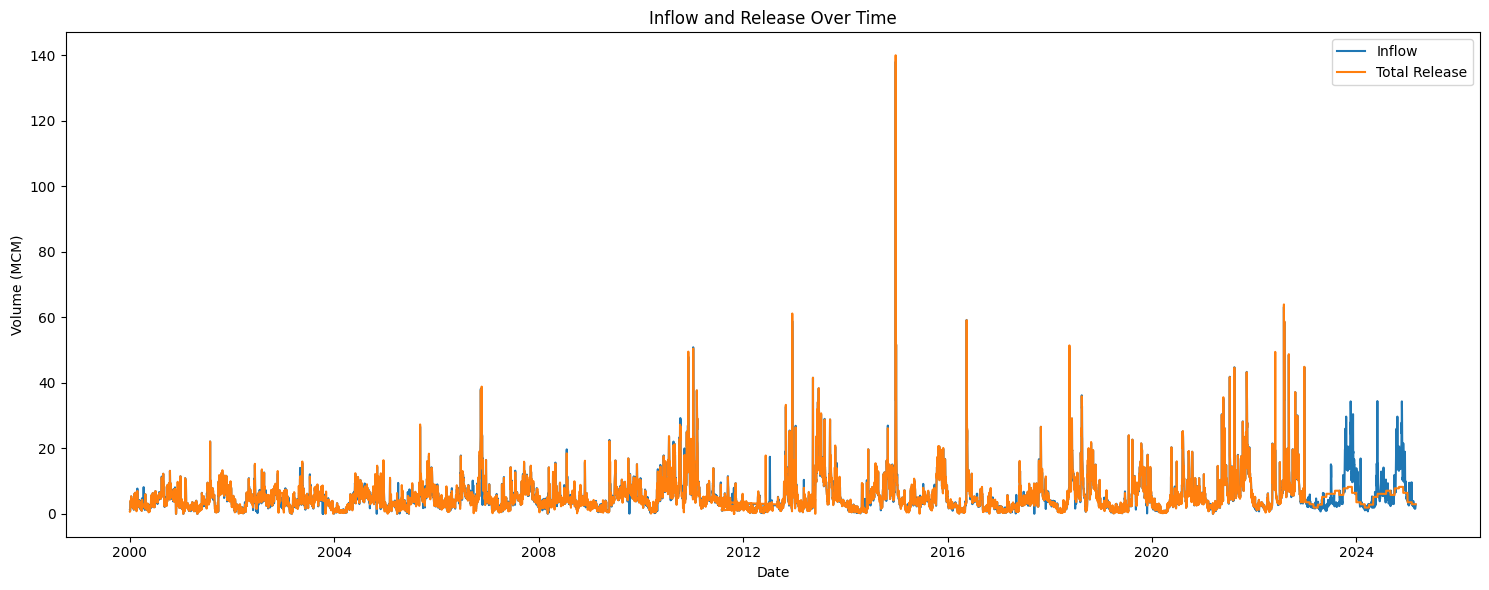

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(df['DATE'], df['INFLOW(MCM)'], label='Inflow')
plt.plot(df['DATE'], df['TOTAL_RELESE(MCM)'], label='Total Release')
plt.title('Inflow and Release Over Time')
plt.xlabel('Date')
plt.ylabel('Volume (MCM)')
plt.legend()
plt.tight_layout()
# plt.savefig('inflow_outflow_time_series.png')
# plt.close()
plt

In [ ]:
# https://drive.google.com/drive/folders/1F750xgkO6x-sldwwxRPv1RMdsldyjNwu?usp=sharing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9191 entries, 0 to 9190
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATE                             9191 non-null   datetime64[ns]
 1   WATER_LEVEL(MSL)                 9191 non-null   float64       
 2   STORAGE_(MCM)                    9191 non-null   float64       
 3   STORAGE__PERCENTAGE              9191 non-null   float64       
 4   RAJARATA_POWER_RELEASE(MCM)      9191 non-null   float64       
 5   VICTORIYA_SPILLWAY_RELEASE(MCM)  9191 non-null   float64       
 6   TOTAL_RELESE(MCM)                9191 non-null   float64       
 7   INFLOW(MCM)                      9191 non-null   float64       
 8   ENERGY(MWh)                      9191 non-null   float64       
 9   RAINFALL(mm)                     9191 non-null   float64       
 10  MONTH                            9191 non-null   int32      

In [ ]:
#save
df.to_csv('hydrodata_polgolla_processed_2000-2025.csv', index=False)

In [ ]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd

# Load data from CSV file
# df = pd.read_csv('hydrodata_polgolla_processed.csv')

df['DATE'] = pd.to_datetime(df['DATE'])

monthly_data = df.groupby(['YEAR', 'MONTH']).agg({
    'WATER_LEVEL(MSL)': 'mean',
    'STORAGE_(MCM)': 'mean',
    'STORAGE__PERCENTAGE': 'mean',
    'RAJARATA_POWER_RELEASE(MCM)': 'sum',
    'VICTORIYA_SPILLWAY_RELEASE(MCM)': 'sum',
    'TOTAL_RELESE(MCM)': 'sum',
    'INFLOW(MCM)': 'sum',
    'ENERGY(MWh)': 'sum',
    'RAINFALL(mm)': 'sum',
    'WATER_BALANCE': 'sum'
}).reset_index()

monthly_data['DATE'] = pd.to_datetime(monthly_data[['YEAR', 'MONTH']].assign(DAY=1)) + MonthEnd(1)

monthly_data.to_csv('../data/hydrodata_polgolla_processed_2000-2025_monthly_data.csv', index=False)

Data has been successfully converted to month-wise format with the 'DATE' column as the end of the month.


In [ ]:
monthly_data

,YEAR,MONTH,WATER_LEVEL(MSL),STORAGE_(MCM),STORAGE__PERCENTAGE,RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),TOTAL_RELESE(MCM),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm),WATER_BALANCE,DATE
0,2000,1,440.699677,4.065452,98.867742,51.962000,36.057000,88.019000,88.747000,9683.000000,12.9,0.728000,2000-01-31
1,2000,2,440.711034,4.079776,99.216379,26.440000,93.496000,115.035000,115.006000,4658.000000,170.3,-0.029000,2000-02-29
2,2000,3,440.326774,4.099806,99.703548,18.302148,70.017429,80.991164,76.112286,3080.982276,171.2,-4.878878,2000-03-31
3,2000,4,440.599667,4.110067,99.953000,30.912418,65.460319,80.385650,78.338827,5619.539335,166.3,-2.046822,2000-04-30
4,2000,5,440.582903,3.932097,95.625161,47.308000,14.191000,61.499000,60.995000,9051.000000,51.3,-0.504000,2000-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2024,10,440.291935,3.608065,87.744839,114.937000,350.536000,240.936174,464.853000,20146.000000,524.0,223.916826,2024-10-31
297,2024,11,440.310333,3.640783,85.221000,93.655000,439.115000,246.519043,533.092000,16830.000000,469.7,286.572957,2024-11-30
298,2024,12,440.576774,3.916613,95.247097,115.812000,181.960000,198.103858,297.172000,20704.000000,37.0,99.068142,2024-12-31
299,2025,1,440.526774,3.868758,91.083871,45.030000,99.953000,109.258028,145.190000,8365.000000,206.6,35.931972,2025-01-31


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = monthly_data

# Convert the 'DATE' column to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

In [ ]:

# Display basic info about the dataset
print("Dataset Info:")
data.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   YEAR                             301 non-null    int32         
 1   MONTH                            301 non-null    int32         
 2   WATER_LEVEL(MSL)                 301 non-null    float64       
 3   STORAGE_(MCM)                    301 non-null    float64       
 4   STORAGE__PERCENTAGE              301 non-null    float64       
 5   RAJARATA_POWER_RELEASE(MCM)      301 non-null    float64       
 6   VICTORIYA_SPILLWAY_RELEASE(MCM)  301 non-null    float64       
 7   TOTAL_RELESE(MCM)                301 non-null    float64       
 8   INFLOW(MCM)                      301 non-null    float64       
 9   ENERGY(MWh)                      301 non-null    float64       
 10  RAINFALL(mm)                     301 non-null   

In [ ]:
print(data.describe())

              YEAR       MONTH  WATER_LEVEL(MSL)  STORAGE_(MCM)  \
count   301.000000  301.000000        301.000000     301.000000   
mean   2012.086379    6.461794        439.649877       3.931832   
min    2000.000000    1.000000        409.100714       3.449194   
25%    2006.000000    3.000000        440.489677       3.836871   
50%    2012.000000    6.000000        440.608276       3.958276   
75%    2018.000000    9.000000        440.703667       4.073500   
max    2025.000000   12.000000        440.740000       4.154633   
std       7.288291    3.475059          4.419576       0.160793   

       STORAGE__PERCENTAGE  RAJARATA_POWER_RELEASE(MCM)  \
count           301.000000                   301.000000   
mean             96.378826                    74.029304   
min              42.801000                     9.310000   
25%              93.343000                    47.308000   
50%              96.238387                    72.108000   
75%              99.090000                

In [ ]:
print(data.isnull().sum())

YEAR                               0
MONTH                              0
WATER_LEVEL(MSL)                   0
STORAGE_(MCM)                      0
STORAGE__PERCENTAGE                0
RAJARATA_POWER_RELEASE(MCM)        0
VICTORIYA_SPILLWAY_RELEASE(MCM)    0
TOTAL_RELESE(MCM)                  0
INFLOW(MCM)                        0
ENERGY(MWh)                        0
RAINFALL(mm)                       0
WATER_BALANCE                      0
DATE                               0
dtype: int64


In [ ]:
# Correlation matrix to check relationships between numeric variables
correlation_matrix = data.corr()

In [ ]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd

# Load data from CSV file
# df = pd.read_csv('hydrodata_polgolla_processed.csv')

df['DATE'] = pd.to_datetime(df['DATE'])

monthly_data = df.groupby(['YEAR', 'MONTH']).agg({
    'WATER_LEVEL(MSL)': 'mean',
    'STORAGE_(MCM)': 'mean',
    'STORAGE__PERCENTAGE': 'mean',
    'RAJARATA_POWER_RELEASE(MCM)': 'sum',
    'VICTORIYA_SPILLWAY_RELEASE(MCM)': 'sum',
    'TOTAL_RELESE(MCM)': 'sum',
    'INFLOW(MCM)': 'sum',
    'ENERGY(MWh)': 'sum',
    'RAINFALL(mm)': 'sum',
    'WATER_BALANCE': 'sum'
}).reset_index()

monthly_data['DATE'] = pd.to_datetime(monthly_data[['YEAR', 'MONTH']].assign(DAY=1)) + MonthEnd(1)

monthly_data.to_csv('hydrodata_polgolla_processedmonthly_data.csv', index=False)

print("Data has been successfully converted to month-wise format with the 'DATE' column as the end of the month.")

Data has been successfully converted to month-wise format with the 'DATE' column as the end of the month.


In [ ]:
monthly_data

,DATE,STORAGE_(MCM),WATER_LEVEL(MSL),INFLOW(MCM),ENERGY(MWh),RAINFALL(mm),TOTAL_RELESE(MCM),RAJARATA_POWER_RELEASE(MCM),VICTORIYA_SPILLWAY_RELEASE(MCM),WATER_BALANCE
0,2000-01-31,4.065452,440.699677,88.747000,9683.000000,12.9,88.019000,51.962000,36.057000,0.728000
1,2000-02-29,4.079776,440.711034,115.006000,4658.000000,170.3,115.035000,26.440000,93.496000,-0.029000
2,2000-03-31,4.099806,440.326774,76.112286,3080.982276,171.2,80.991164,18.302148,70.017429,-4.878878
3,2000-04-30,4.110067,440.599667,78.338827,5619.539335,166.3,80.385650,30.912418,65.460319,-2.046822
4,2000-05-31,3.932097,440.582903,60.995000,9051.000000,51.3,61.499000,47.308000,14.191000,-0.504000
...,...,...,...,...,...,...,...,...,...,...
296,2024-10-31,3.608065,440.291935,464.853000,20146.000000,524.0,240.936174,114.937000,350.536000,223.916826
297,2024-11-30,3.640783,440.310333,533.092000,16830.000000,469.7,246.519043,93.655000,439.115000,286.572957
298,2024-12-31,3.916613,440.576774,297.172000,20704.000000,37.0,198.103858,115.812000,181.960000,99.068142
299,2025-01-31,3.868758,440.526774,145.190000,8365.000000,206.6,109.258028,45.030000,99.953000,35.931972


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from scipy import stats

# Sample data preparation (if needed)
# monthly_data = pd.read_csv("your_data.csv")

# Convert DATE to datetime
monthly_data['DATE'] = pd.to_datetime(monthly_data['DATE'])

agg_monthly_data = monthly_data.groupby('DATE').agg(
    total_rajarata_release=('RAJARATA_POWER_RELEASE(MCM)', 'sum'),
    total_victoriya_release=('VICTORIYA_SPILLWAY_RELEASE(MCM)', 'sum')
).reset_index()

def get_regression_line(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(x)), y)
    line = slope * np.arange(len(x)) + intercept
    return line, slope, r_value**2  

fig = go.Figure()

# Rajarata Release Trend
rajarata_trend, rajarata_slope, rajarata_r2 = get_regression_line(agg_monthly_data['DATE'], agg_monthly_data['total_rajarata_release'])
fig.add_trace(go.Scatter(
    x=agg_monthly_data['DATE'],
    y=agg_monthly_data['total_rajarata_release'],
    mode='markers+lines',
    name=f'Rajarata Release (Slope: {rajarata_slope:.4f}, R²: {rajarata_r2:.4f})',
    line=dict(color='blue'),
    marker=dict(size=6, opacity=0.7)
))

fig.add_trace(go.Scatter(
    x=agg_monthly_data['DATE'],
    y=rajarata_trend,
    mode='lines',
    name='Trend - Rajarata Release',
    line=dict(color='blue', dash='dash')
))

# Victoria Release Trend
victoriya_trend, victoriya_slope, victoriya_r2 = get_regression_line(agg_monthly_data['DATE'], agg_monthly_data['total_victoriya_release'])
fig.add_trace(go.Scatter(
    x=agg_monthly_data['DATE'],
    y=agg_monthly_data['total_victoriya_release'],
    mode='markers+lines',
    name=f'Victoria Release (Slope: {victoriya_slope:.4f}, R²: {victoriya_r2:.4f})',
    line=dict(color='purple'),
    marker=dict(size=6, opacity=0.7)
))

fig.add_trace(go.Scatter(
    x=agg_monthly_data['DATE'],
    y=victoriya_trend,
    mode='lines',
    name='Trend - Victoria Release',
    line=dict(color='purple', dash='dash')
))

fig.update_layout(
    title="Total Rajarata vs Victoria Release Trends",
    xaxis_title="Date",
    yaxis_title="MCM (Million Cubic Meters)",
    legend_title="Legend",
    template="plotly_dark",
    xaxis_rangeslider_visible=False,
    hovermode="closest",
    width=1000,
    height=700
)

fig.show()

fig.write_html("total_rajarata_vs_victoria_trends.html")